# Importing Libaries

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

# Plot Function and Root MSE function

In [58]:
def plot_predictions(test,predicted):
    plt.figure(figsize = (20,10))
    plt.plot(test, color='red',label='Real DSEX Stock Price')
    plt.plot(predicted, color='blue',label='Predicted DSEX Stock Price')
    plt.title('DSEX Stock Price Prediction')
    plt.xlabel('Time/Observation')
    plt.ylabel('DSEX Stock Price')
    plt.legend()
    plt.show()

In [3]:
def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

# Data read

In [4]:
dataset = pd.read_csv('DSEX.csv', index_col='Date', parse_dates=['Date'])
dataset.tail()

,Price,Open,High,Low,Unnamed: 5,Unnamed: 6
Date,,,,,,
2013-02-05,4191.50,4191.50,4191.50,4191.50,NaN,NaN
2013-02-04,4164.62,4164.62,4164.62,4164.62,NaN,NaN
2013-02-03,4163.82,4163.82,4163.82,4163.82,NaN,NaN
2013-01-31,4136.30,4136.30,4136.30,4136.30,NaN,NaN
2013-01-30,4126.75,4126.75,4126.75,4126.75,NaN,NaN


In [5]:
data=dataset.drop(columns=['Unnamed: 5', 'Unnamed: 6']) # Original Data


# Train and Testing Set

In [40]:
training_set = data['2016':].iloc[:,0:5]
test_set = data[:'2017'].iloc[:,0:1].values

In [7]:
len(training_set)

938

In [22]:
len(test_set)

331

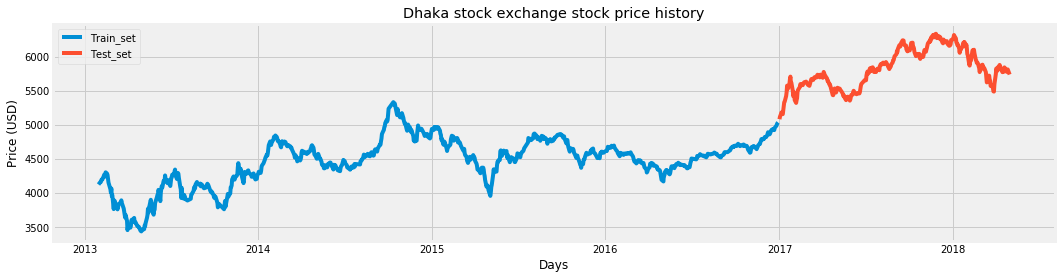

In [8]:
from matplotlib import pyplot as plt
plt.figure(figsize=(16,4))

plt.plot(training_set["Price"])
plt.plot(test_set["Price"])

plt.title('Dhaka stock exchange stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Train_set','Test_set'], loc='upper left')
plt.show()

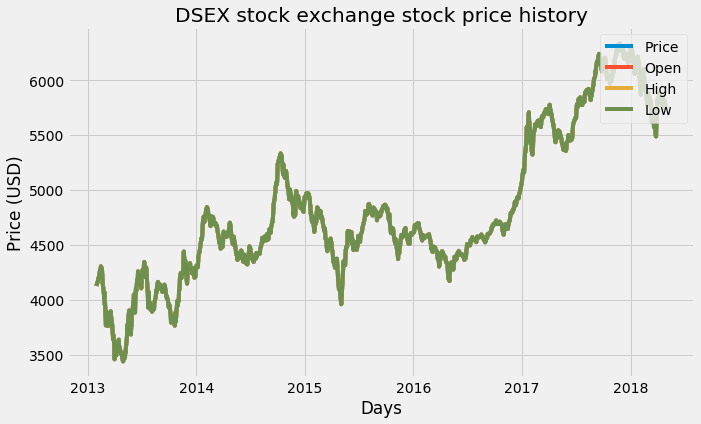

In [10]:
plt.figure(figsize = (10,6))
plt.plot(dataset["Price"])
plt.plot(dataset["Open"])
plt.plot(dataset["High"])
plt.plot(dataset["Low"])
plt.title('DSEX stock exchange stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Price','Open','High','Low'], loc='upper right')
plt.show()

In [11]:
train= training_set.values.reshape(-1, 1)
test = test_set.values.reshape(-1, 1)

In [12]:
scaler = MinMaxScaler(feature_range=(-1, 1))
train_sc = scaler.fit_transform(train)
test_sc = scaler.fit_transform(test)

In [13]:
X_train = train_sc[:-1]
y_train = train_sc[1:]
X_test = test_sc[:-1]
y_test = test_sc[1:]

In [14]:
XL_train = []
yL_train = []
for i in range(60,938+60):
    XL_train.append(train_sc[i-60:i,0])
    yL_train.append(train_sc[i,0])
XL_train, yL_train = np.array(XL_train), np.array(yL_train)

In [18]:
XL_train = np.reshape(XL_train, (XL_train.shape[0],XL_train.shape[1],1))

In [19]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(XL_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')

In [20]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history = regressor.fit(XL_train, yL_train, epochs=100, batch_size=32, verbose=1, callbacks=[early_stop], shuffle=False)





Instructions for updating:
Use tf.cast instead.
Epoch 1/100
938/938 [==============================] - 139s 148ms/step - loss: 0.0153
Epoch 2/100
938/938 [==============================] - 99s 105ms/step - loss: 0.0054
Epoch 3/100
938/938 [==============================] - 122s 130ms/step - loss: 0.0053
Epoch 4/100
938/938 [==============================] - 96s 103ms/step - loss: 0.0053
Epoch 5/100
938/938 [==============================] - 42s 45ms/step - loss: 0.0043
Epoch 6/100
938/938 [==============================] - 36s 39ms/step - loss: 0.0041
Epoch 7/100
938/938 [==============================] - 40s 42ms/step - loss: 0.0043
Epoch 8/100
938/938 [==============================] - 40s 43ms/step - loss: 0.0035
Epoch 9/100
938/938 [==============================] - 39s 41ms/step - loss: 0.0037
Epoch 10/100
938/938 [==============================] - 41s 43ms/step - loss: 0.0037
Epoch 00010: early stopping


In [21]:
dataset_total = pd.concat((dataset["Price"]['2016':],dataset["Price"][:'2017']),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [65]:
XL_test = []
yL_test = []
for i in range(60,330+60): #lenght of y_test+60
    XL_test.append(inputs[i-60:i,0])
    yL_test.append(inputs[i,0])
XL_test = np.array(XL_test)
XL_test = np.reshape(XL_test, (XL_test.shape[0],XL_test.shape[1],1))


predicted_stock_price = regressor.predict(XL_test)

In [66]:
return_rmse(y_test,predicted_stock_price)

The root mean squared error is 0.31967352920831377.


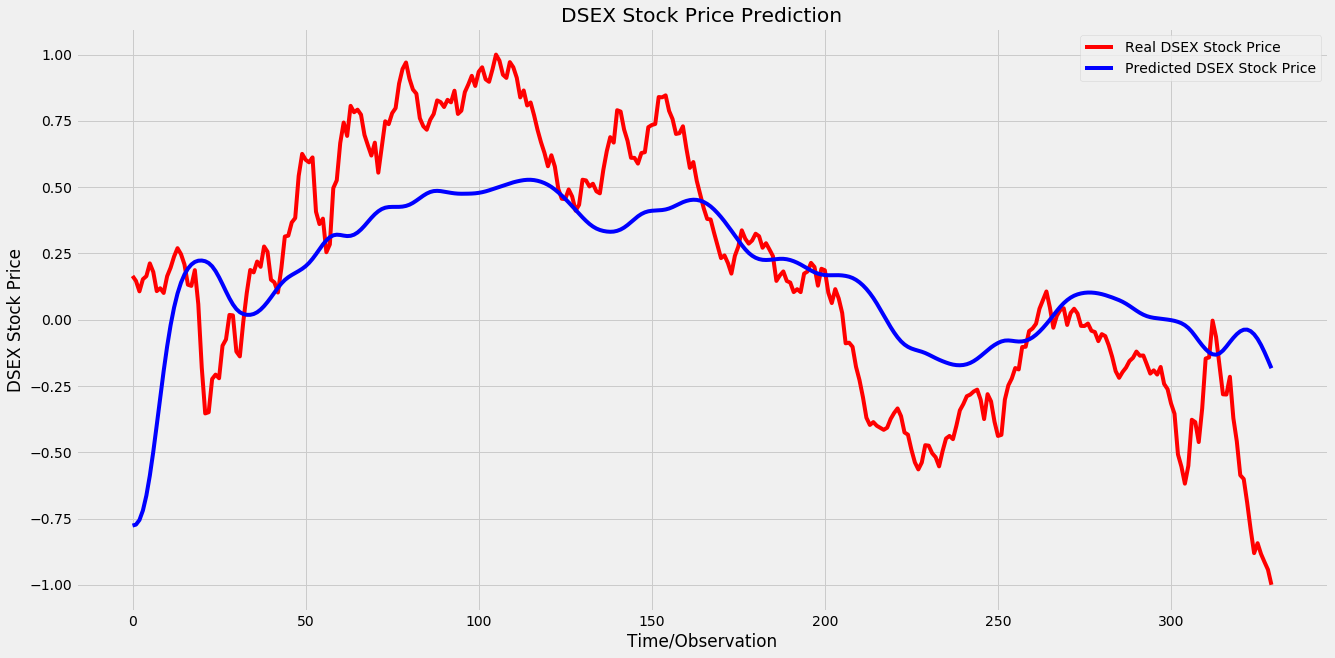

In [59]:
plot_predictions(y_test,predicted_stock_price)

In [56]:
predicted_stock_price_or = scaler.inverse_transform(predicted_stock_price)

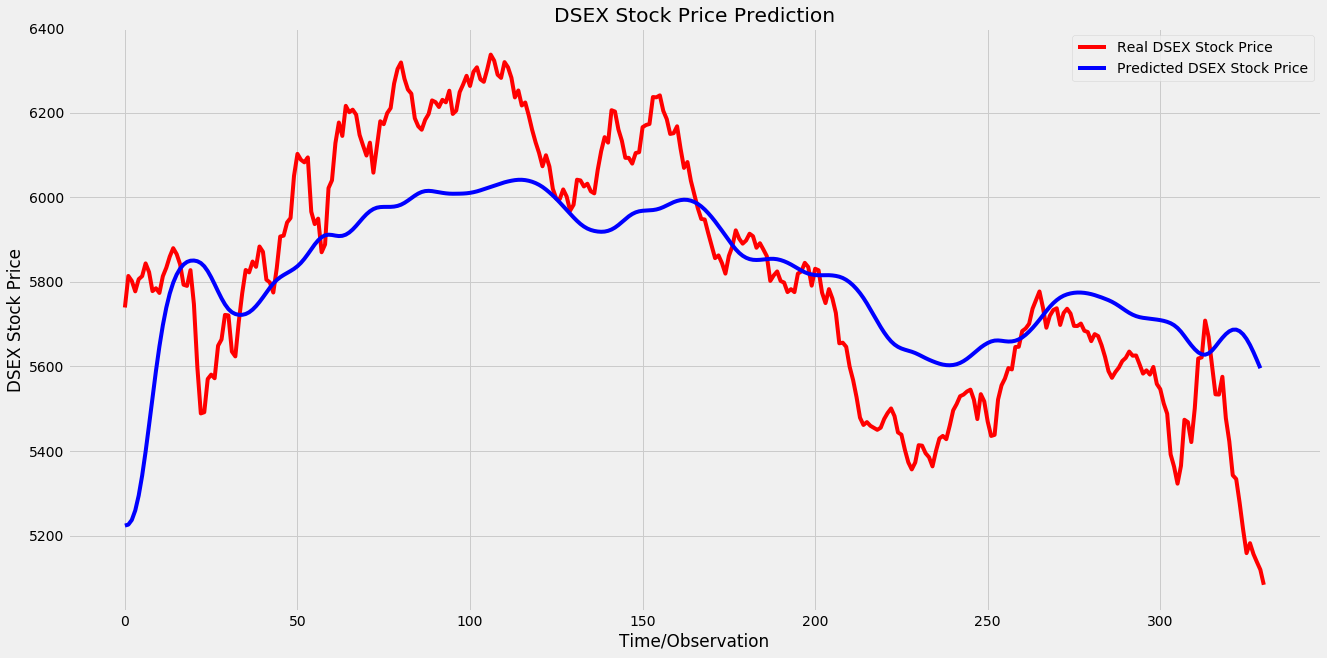

In [60]:
plot_predictions(test_set,predicted_stock_price_or)

In [67]:
from sklearn.metrics import r2_score

y_pred_test_nn = regressor.predict(XL_test)
y_train_pred_nn = regressor.predict(XL_train)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(yL_train, y_train_pred_nn)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(yL_test, y_pred_test_nn)))

The R2 score on the Train set is:	0.747
The R2 score on the Test set is:	0.549
